# To convert single example CT sample into (32,32,16) patch

### Source: https://github.com/rogertrullo/generate_3d_data/blob/master/create_dataset.ipynb


In [1]:
import h5py, os
import numpy as np
import SimpleITK as sitk
#import caffe
import scipy.io as scio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
path_patients='D:/seg/jun ma/COVID-19-CT-Seg_20cases'
root, folders, patients = next(os.walk(path_patients))#every folder is a patient
print (patients)

['coronacases_001.nii.gz', 'coronacases_002.nii.gz', 'coronacases_003.nii.gz', 'coronacases_004.nii.gz', 'coronacases_005.nii.gz', 'coronacases_006.nii.gz', 'coronacases_007.nii.gz', 'coronacases_008.nii.gz', 'coronacases_009.nii.gz', 'coronacases_010.nii.gz', 'radiopaedia_10_85902_1.nii.gz', 'radiopaedia_10_85902_3.nii.gz', 'radiopaedia_14_85914_0.nii.gz', 'radiopaedia_27_86410_0.nii.gz', 'radiopaedia_29_86490_1.nii.gz', 'radiopaedia_29_86491_1.nii.gz', 'radiopaedia_36_86526_0.nii.gz', 'radiopaedia_40_86625_0.nii.gz', 'radiopaedia_4_85506_1.nii.gz', 'radiopaedia_7_85703_0.nii.gz']


In [3]:
#body is the manual segmentation of the body; from here we will sample bg patches
#body=scio.loadmat(os.path.join(path_patients,patients[0],'contour.mat'))
#body=body['vol']

In [4]:
#ctvol is the data volume
ctvolitk=sitk.ReadImage(os.path.join(path_patients,patients[0])) 
ctvol=sitk.GetArrayFromImage(ctvolitk)   
ctvol=np.transpose(ctvol,(1,2,0))#matlab order, rows,cols,slices

In [5]:
path_mask = 'D:/seg/jun ma/Infection_Mask'
root, folders, patients_mask = next(os.walk(path_mask))#every folder is a patient
print (patients_mask)


['coronacases_001.nii.gz', 'coronacases_002.nii.gz', 'coronacases_003.nii.gz', 'coronacases_004.nii.gz', 'coronacases_005.nii.gz', 'coronacases_006.nii.gz', 'coronacases_007.nii.gz', 'coronacases_008.nii.gz', 'coronacases_009.nii.gz', 'coronacases_010.nii.gz', 'radiopaedia_10_85902_1.nii.gz', 'radiopaedia_10_85902_3.nii.gz', 'radiopaedia_14_85914_0.nii.gz', 'radiopaedia_27_86410_0.nii.gz', 'radiopaedia_29_86490_1.nii.gz', 'radiopaedia_29_86491_1.nii.gz', 'radiopaedia_36_86526_0.nii.gz', 'radiopaedia_40_86625_0.nii.gz', 'radiopaedia_4_85506_1.nii.gz', 'radiopaedia_7_85703_0.nii.gz']


(512, 512, 301)


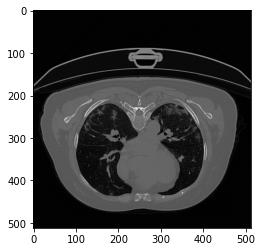

In [6]:
#segnp is the groundtruth volume
segitk=sitk.ReadImage(os.path.join(path_mask,patients_mask[0]))
segnp=sitk.GetArrayFromImage(segitk)
segnp=np.transpose(segnp,(1,2,0))#matlab order, rows,cols,slices
[rows,cols,slices]= ctvol.shape
print(ctvol.shape)
plt.imshow(ctvol[:,:,150],cmap='gray')

In [7]:
patch_sz=[32,32,16]
all_organs_mask=segnp>0 #every voxel belonging to an organ will be one

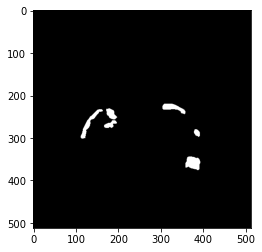

In [8]:
maskborders=np.ones_like(all_organs_mask)
# we put zero so we cant choose patches containing elements out of range

#maskborders[rows-patch_sz[0]+1:rows,cols-patch_sz[1]+1:cols,:]=0; 


maskborders[rows-patch_sz[0]+1:rows,:,:]=0; 
maskborders[:,cols-patch_sz[1]+1:cols,:]=0; 
maskborders[:,:,slices-patch_sz[2]+1:slices]=0;

#maskbody=np.logical_and(body,maskborders) 
#mask_eso=(segnp==1)*maskborders
#mask_heart=(segnp==2)*maskborders;
#mask_trach=(segnp==3)*maskborders;
#mask_aorta=(segnp==4)*maskborders;
mask_cov=(segnp==1)*maskborders
plt.imshow(mask_cov[:,:,160],cmap='gray')

In [9]:
#bgidx=np.where(np.logical_and(maskbody,np.logical_not(all_organs_mask)>0))
#esoidx=np.where(mask_eso==1)
#heartidx=np.where(mask_heart==1)
#trachidx=np.where(mask_trach==1)
#aortaidx=np.where(mask_aorta==1)
covidx=np.where(mask_cov==1)

301


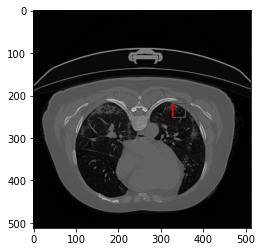

In [10]:
print(slices)
#print bgidx[0].max()
#print bgidx[1].max()
#print bgidx[2].max()
fig,ax = plt.subplots(1)

npatch=100;

ax.imshow(ctvol[:,:,covidx[2][npatch]],cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((covidx[1][npatch],covidx[0][npatch]),patch_sz[0],patch_sz[1],linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [11]:
X=ctvol[covidx[0][npatch]:covidx[0][npatch]+patch_sz[0],covidx[1][npatch]:covidx[1][npatch]+patch_sz[1],covidx[2][npatch]:covidx[2][npatch]+patch_sz[2]]
y=segnp[covidx[0][npatch]:covidx[0][npatch]+patch_sz[0],covidx[1][npatch]:covidx[1][npatch]+patch_sz[1],covidx[2][npatch]:covidx[2][npatch]+patch_sz[2]]
print(X.shape)
print(y.shape)

(32, 32, 16)
(32, 32, 16)
